[Iris 분류]
- 데이터셋: iris.csv
- feature(특성): petal.length, petal.width
- target(라벨): variety
- 학습방법: 지도학습 중 분류
- 학습 알고리즘: 최근접이웃 알고리즘

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_file='../data/iris.csv'

In [5]:
irisdf=pd.read_csv(data_file)
irisdf

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
irisdf.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [7]:
irisdf=irisdf.drop(columns=['sepal.length','sepal.width'])
irisdf

,petal.length,petal.width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa
...,...,...,...
145,5.2,2.3,Virginica
146,5.0,1.9,Virginica
147,5.2,2.0,Virginica
148,5.4,2.3,Virginica


In [8]:
mask=(irisdf['variety']=='Setosa')|(irisdf['variety']=='Versicolor')
irisdf=irisdf[mask]
irisdf.reset_index(drop=True,inplace=True)
irisdf.index

RangeIndex(start=0, stop=100, step=1)

In [9]:
new=irisdf.loc[:,'variety'].replace({'Setosa':0, 'Versicolor':1})
irisdf['species']=new
irisdf

C:\Users\desktop\AppData\Local\Temp\ipykernel_13008\3357394018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irisdf['species']=new


,petal.length,petal.width,variety,species
0,1.4,0.2,Setosa,0
1,1.4,0.2,Setosa,0
2,1.3,0.2,Setosa,0
3,1.5,0.2,Setosa,0
4,1.4,0.2,Setosa,0
...,...,...,...,...
95,4.2,1.2,Versicolor,1
96,4.2,1.3,Versicolor,1
97,4.3,1.3,Versicolor,1
98,3.0,1.1,Versicolor,1


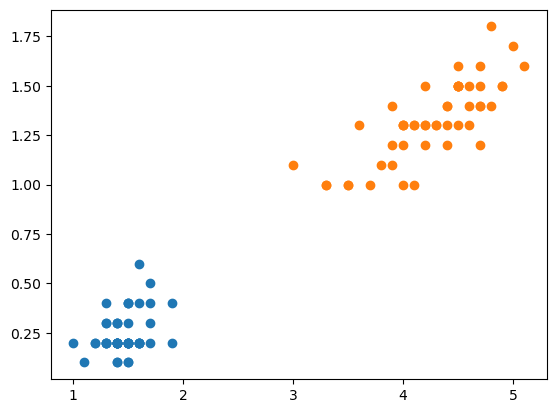

In [10]:
plt.scatter(irisdf.loc[:49,'petal.length'],irisdf.loc[:49,'petal.width'])
plt.scatter(irisdf.loc[50:,'petal.length'],irisdf.loc[50:,'petal.width'])
plt.show()

In [11]:
feature=irisdf[['petal.length','petal.width']]
target=irisdf['species']

print(f'feature: {feature.shape}, {feature.ndim}D')
print(f'target: {target.shape}, {target.ndim}D')

feature: (100, 2), 2D
target: (100,), 1D


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test=train_test_split(feature,target,test_size=0.2,stratify=target,random_state=10)

In [14]:
print(f'x_train:{x_train.shape},{x_train.ndim}D')
print(f'y_train:{y_train.shape},{y_train.ndim}D')

print(f'x_test:{x_test.shape},{x_test.ndim}D')
print(f'y_test:{y_test.shape},{y_test.ndim}D')

x_train:(80, 2),2D
y_train:(80,),1D
x_test:(20, 2),2D
y_test:(20,),1D


In [15]:
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.5, 0.5)

In [16]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.5, 0.5)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model=KNeighborsClassifier()

In [19]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
model.classes_, model.feature_names_in_,model.n_samples_fit_

(array([0, 1], dtype=int64),
 array(['petal.length', 'petal.width'], dtype=object),
 80)

In [21]:
model.score(x_test,y_test)

1.0

In [22]:
new_data=pd.DataFrame([[2,1]],columns=model.feature_names_in_)
new_data

,petal.length,petal.width
0,2,1


In [23]:
model.predict(new_data)

array([0], dtype=int64)

In [24]:
distance,index=model.kneighbors(new_data)

In [25]:
distance

array([[0.58309519, 0.60827625, 0.67082039, 0.72111026, 0.76157731]])

In [26]:
index

array([[23,  8, 78, 43, 60]], dtype=int64)

In [27]:
neighbors=index.reshape(-1).tolist()
neighbors

[23, 8, 78, 43, 60]

In [28]:
irisdf.iloc[neighbors]

,petal.length,petal.width,variety,species
23,1.7,0.5,Setosa,0
8,1.4,0.2,Setosa,0
78,4.5,1.5,Versicolor,1
43,1.6,0.6,Setosa,0
60,3.5,1.0,Versicolor,1


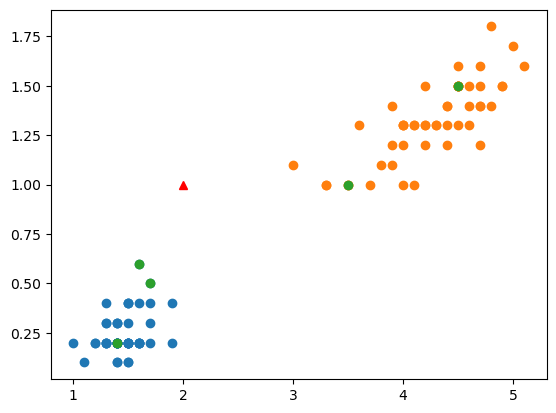

In [29]:
plt.scatter(irisdf.loc[:49,'petal.length'],irisdf.loc[:49,'petal.width'])
plt.scatter(irisdf.loc[50:,'petal.length'],irisdf.loc[50:,'petal.width'])
plt.plot(new_data['petal.length'],new_data['petal.width'],'r^')
plt.scatter(irisdf.iloc[neighbors]['petal.length'],irisdf.iloc[neighbors]['petal.width'])
plt.show()